In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.offsetbox import AnchoredText
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as m

In [2]:
# load SLP and U-V wind
ERApath = "/scratch/project_2000339/boeiradi/ERA-interim/"
# load ROMS avg output
msl = np.empty((0,241,480))
u10 = np.empty((0,241,480))
v10 = np.empty((0,241,480))
t2m = np.empty((0,241,480))

for mm in ['06','07','08','09']:
    d1 = xr.open_dataset(ERApath + "MSLP_2007" + mm + ".nc")
    d2 = xr.open_dataset(ERApath + "UVWND_2007" + mm + ".nc")    
    d3 = xr.open_dataset(ERApath + "SAT_2007" + mm + ".nc")    
    msl_tmp = d1.variables["msl"]
    u10_tmp = d2.variables["u10"]
    v10_tmp = d2.variables["v10"]
    t2m_tmp = d3.variables["t2m"]
    time_tmp = d1.variables["time"]
    print('Reading ERA-Interim month = ', mm)
    print('length = ', len(time_tmp))
    msl = np.concatenate((msl, msl_tmp), axis=0)
    u10 = np.concatenate((u10, u10_tmp), axis=0)
    v10 = np.concatenate((v10, v10_tmp), axis=0)
    t2m = np.concatenate((t2m,t2m_tmp), axis=0)
    if mm == "06":
        time = time_tmp
        lon = d1.variables["longitude"]
        lat = d1.variables["latitude"]
    else:
        time = np.concatenate((time, time_tmp), axis=0)
    del msl_tmp, u10_tmp, v10_tmp, t2m_tmp, time_tmp
    
    

Reading ERA-Interim month =  06
length =  241
Reading ERA-Interim month =  07
length =  249
Reading ERA-Interim month =  08
length =  249
Reading ERA-Interim month =  09
length =  241


In [3]:
print(msl.shape, u10.shape, v10.shape)     
print(lon.shape,lat[::2].shape)
print(time.shape)
#time

(980, 241, 480) (980, 241, 480) (980, 241, 480)
(480,) (121,)
(980,)


In [4]:
timestamp_storms_jun = [18, 35, 82]
timestamp_storms_jul = [14+241, 59+241, 98+241]
timestamp_storms_aug = [13+241+249, 41+241+249, 203+241+249]
timestamp_storms_sep = [201+241+249+249]

time_storms = timestamp_storms_jun + timestamp_storms_jul + timestamp_storms_aug + timestamp_storms_sep
print(time_storms)

name_storms = [('4-6.June.2007'),('7-11.June.2007'),('20-24.June.2007'),('2-7.July.2007'),('15.July.2007'),('20-27.July.2007'),('1-5.August.2007'),('8-11.August.2007'),('20.August.2007'),('20-22.September.2007')]


[18, 35, 82, 255, 300, 339, 503, 531, 693, 940]


In [5]:
print(len(name_storms))

#name_storms

time_storms



10


[18, 35, 82, 255, 300, 339, 503, 531, 693, 940]

In [6]:
proj = ccrs.SouthPolarStereo()

def lonlat_labels_EastAntarctica(ax):
    # latitude labels
    ax.text(90,-80,'80$^{\circ}$S',transform=ccrs.PlateCarree(),color='white',fontsize=11)
    ax.text(90,-70,'70$^{\circ}$S',transform=ccrs.PlateCarree(),color='white',fontsize=11)
    # longitude labels
    ax.text(40,-75,'40$^{\circ}$E',transform=ccrs.PlateCarree(),color='white',fontsize=11)
    #ax.text(60,-53,'60$^{\circ}$E',transform=ccrs.PlateCarree(),color='white')
    #ax.text(120,-53,'120$^{\circ}$E',transform=ccrs.PlateCarree(),color='white')
    #ax.text(-60,-48,'60$^{\circ}$W',transform=ccrs.PlateCarree(),color='white',fontsize=11)
    #ax.text(-120,-48,'120$^{\circ}$W',transform=ccrs.PlateCarree(),color='white',fontsize=11)
    ax.text(140,-75,'140$^{\circ}$E',transform=ccrs.PlateCarree(),color='white',fontsize=11)
    return

figs_path="/users/boeiradi/COLD_project/postprocessing/figs/ERA-Interim/" 

/scratch/project_2000339/boeiradi/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


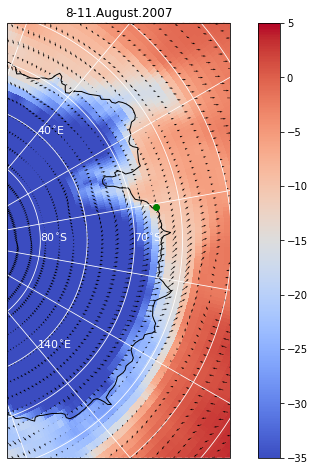

In [39]:
# plot event of 8-11 August to find Barrier polynya gridpoint

event = name_storms[7]
tt=time_storms[7]
    
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection=proj)

ci=plt.pcolor(lon,lat,np.squeeze(t2m[tt,:,:])-273.15, cmap=plt.cm.coolwarm, vmin=-35, vmax=5, transform=ccrs.PlateCarree())
cv=plt.quiver(lon[::2],lat[::2],np.squeeze(u10[tt,::2,::2]),np.squeeze(v10[tt,::2,::2]), color='k',scale=2.8, scale_units='dots', transform=ccrs.PlateCarree())
plt.plot(81,-67.5,'go', transform=ccrs.PlateCarree())

ax.gridlines(color='white')
ax.coastlines(resolution='110m',color='black')
lonlat_labels_EastAntarctica(ax)
ax.set_extent([40, 140, -80, -60], crs=ccrs.PlateCarree())
#cbar_axim = fig.add_axes([0.72, 0.3, 0.015, 0.4])
cbar =fig.colorbar(ci)#, cax=cbar_axim)
plt.ylabel('Air temperature (2m, $^{\circ}$C)',fontsize=11)
plt.title(event)

#plt.show()


namefig="Storms_sat+winds_map_" + name_storms[7] + "_new.png"
plt.savefig(figs_path + namefig)#, dpi=200)

In [7]:
#fig = plt.figure(figsize=(10,8))
#plt.plot(lon)
#plt.plot(lon[60],'ro')

# finding lon/lat index for Barrier gridpoint:
print(lon,lat)
print(lon.isel(longitude=108),lat.isel(latitude=210))
print(len(time))

<xarray.IndexVariable 'longitude' (longitude: 480)>
array([  0.  ,   0.75,   1.5 , ..., 357.75, 358.5 , 359.25], dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  longitude <xarray.IndexVariable 'latitude' (latitude: 241)>
array([ 90.  ,  89.25,  88.5 , ..., -88.5 , -89.25, -90.  ], dtype=float32)
Attributes:
    units:      degrees_north
    long_name:  latitude
<xarray.Variable ()>
array(81., dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  longitude <xarray.Variable ()>
array(-67.5, dtype=float32)
Attributes:
    units:      degrees_north
    long_name:  latitude
980


In [8]:
print(time[530])

# t=490 -> 2007-08-01T00:00:00
# t=506 -> 2007-08-05T00:00:00
# t=518 -> 2007-08-08T00:00:00
# t=530 -> 2007-08-11T00:00:00

t1=490
t2=506
t3=518
t4=530

print(time[490])


2007-08-11T00:00:00.000000000
2007-08-01T00:00:00.000000000


In [10]:
dx = xr.open_dataset(ERApath + "MSLP_200708.nc")

dx.time

<xarray.DataArray 'time' (time: 249)>
array(['2007-08-01T00:00:00.000000000', '2007-08-01T06:00:00.000000000',
       '2007-08-01T12:00:00.000000000', ..., '2007-08-31T15:00:00.000000000',
       '2007-08-31T21:00:00.000000000', '2007-09-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2007-08-01 2007-08-01T06:00:00 ... 2007-09-01
Attributes:
    long_name:  time

In [25]:
#u10=-1
#v10=1
Wspd = np.sqrt(u10*u10 + v10*v10)
Wdir_rad = np.arctan2(-v10,-u10)
Wdir = 90 - Wdir_rad*180/np.pi # convert rad->deg and circle->cardinal coordinates
if Wdir < 0:
    Wdir += 360

print(Wdir, Wspd)

135.0 1.4142135623730951


UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

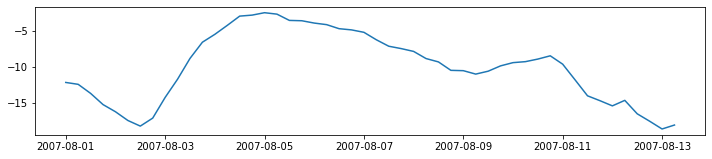

In [18]:
# lon=81E, lat=-67.5
xlon=108
ylat=210
# time;
ti=490
te=540

# calculate wind speed and direction
#for tt in np.arange(0,len(time)):
Wspd = np.sqrt(u10*u10 + v10*v10)
Wdir_rad = np.arctan2(-v10,-u10)
Wdir = 90 - Wdir_rad*180/np.pi # convert rad->deg and circle->cardinal coordinates

Wdir[np.where(Wdir<0)] += 360

# plot SAT, Wind speed, Wind direction
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(311)
#plt.plot(dx.time.isel(time=slice(ti-490,te-490)),np.squeeze(t2m[ti:te,ylat,xlon])-273.15)
ts = (dt64 - dx.time.isel(time=t1-490)) / np.timedelta64(1, 's')

plt.plot(ts*np.ones((5,)),np.arange(-10,-5),'--k')
plt.title('Barrier Polynya: 81$^{\circ}$E, 67.5$^{\circ}$S',fontsize=14)
plt.ylabel('Air temp. (2m, $^{\circ}$C)',fontsize=14)

ax = fig.add_subplot(312)
plt.plot(dx.time.isel(time=slice(ti-490,te-490)),np.squeeze(Wspd[ti:te,ylat,xlon]))
plt.ylabel('Wind speed (m s$^{-1}$)',fontsize=14)

ax = fig.add_subplot(313)
plt.plot(dx.time.isel(time=slice(ti-490,te-490)),np.squeeze(Wdir[ti:te,ylat,xlon]))
plt.ylabel('Wind direction ($^{\circ}$)',fontsize=14)

namefig="Storms_sat+winds_ts_" + name_storms[7] + "_new.png"
plt.savefig(figs_path + namefig, dpi=300)


In [ ]:

def main(tt,count):
    event = name_storms[count]
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection=proj)

    ci=plt.pcolor(lon,lat,0.01*np.squeeze(msl[tt,:,:]), cmap=plt.cm.coolwarm, vmin=960, vmax=1040, transform=ccrs.PlateCarree())
    cv=plt.quiver(lon[::2],lat[::2],np.squeeze(u10[tt,::2,::2]),np.squeeze(v10[tt,::2,::2]), color='k',scale=1.8, scale_units='dots', transform=ccrs.PlateCarree())

    ax.gridlines(color='white')
    ax.coastlines(resolution='110m',color='black')
    lonlat_labels_EastAntarctica(ax)
    ax.set_extent([40, 140, -80, -60], crs=ccrs.PlateCarree())
    #cbar_axim = fig.add_axes([0.72, 0.3, 0.015, 0.4])
    cbar =fig.colorbar(ci)#, cax=cbar_axim)
    plt.ylabel('MSLP (hPa)',fontsize=11)
    plt.title(event)
    
    #plt.show()
    
    namefig="Storms_slp_winds_" + event + "_new.png"
    plt.savefig(figs_path + namefig)#, dpi=300)

count=0
for tind in time_storms:
    main(tind-1,count)
    count=count+1

    
#main(17,0)



In [ ]:
# old plot with different projection/details

def main(tt,count):
    event = name_storms[count]
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
    ax.set_extent([50, 170, -78, -40])

    # Put a background image on for nice sea rendering.
    ax.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

    SOURCE = 'Natural Earth'
    LICENSE = 'public domain'

    ax.add_feature(states_provinces, edgecolor='gray')

    # Add a text annotation for the license information to the
    # the bottom right corner.
    #text = AnchoredText(r'$\mathcircled{{c}}$ {}; license: {}'
    #                    ''.format(SOURCE, LICENSE),
    #                    loc=4, prop={'size': 12}, frameon=True)
    #ax.add_artist(text)
    
    ci=ax.pcolor(lon,lat,0.01*np.squeeze(msl[tt,:,:]), cmap=plt.cm.coolwarm, vmin=960, vmax=1040)
    cv=ax.quiver(lon[::2],lat[::2],np.squeeze(u10[tt,::2,::2]),np.squeeze(v10[tt,::2,::2]), color='gray',scale=1.8, scale_units='dots')
#    cv=ax.quiver(lon,lat,np.squeeze(u10[tt,:,:]),np.squeeze(v10[tt,:,:]), color='gray',scale=1.5, scale_units='dots')

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=.1, color='black', alpha=1.0, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.xlines = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 12, 'color': 'gray'}
    gl.ylabel_style = {'size': 12, 'color': 'gray'}

    ax.add_feature(cfeature.COASTLINE)
    ax.set_title(event)
    
    cbar_axim = fig.add_axes([0.92, 0.3, 0.015, 0.4])
    cbar =fig.colorbar(ci, cax=cbar_axim)
    plt.ylabel('MSLP (hPa)',fontsize=11)

    plt.show()
    
    #namefig="Storms_slp_winds_" + event + ".png"
    #plt.savefig(figs_path + namefig)#, dpi=300)

count=0
for tind in time_storms:
    main(tind-1,count)
    count=count+1

    
#main(17,0)


main(17)